In [ ]:
# Code Cell 1
# Download all the necessary libraries
!pip install --upgrade pandas==1.5.1
!pip install -q pyLDAvis==3.4.0
!python -m spacy download en_core_web_sm
# Import all the necessary libraries and restaurant review data
import pandas as pd
import numpy as np
import spacy
import os
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
import pyLDAvis.lda_model
import warnings
warnings.filterwarnings('ignore')
# Google Drive Connect
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/CIS 509/dataset_for_topic_modelling2.csv')
data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Moun

,business_id,name,state,city,categories,attributes,user_id,useful,text,review_id
0,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",cjLp1QarHZb_SCf6xJmIWQ,5,"Great place to meet friends for a meal, and ma...",8p01KvWxArjQWv5o9o3Kdg
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",h_9gTh9rzzJQb61TbB6QFg,4,Ok. I've literally been going here since I was...,QRAJQOOR8OvMjatVi9YdKg
2,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",38sIAC83IlRNoG_q6ETr9w,4,My two friends and I were looking to have a ch...,KrI8KYSzsWBfNg08sgjoYw
3,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",2trMPz0U5CgOjzE9D_NCCQ,3,The waitress was rude from the start. I work i...,ZQ5LZ40IQWx6kIUf0yFjgA
4,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",lrgq-Gr-l8m0v5WEmVXP6g,3,This dive bar is okay. \n\npros: \ncheap\nbatt...,k4JRsrQP8iW9J3BRq-YHkQ
...,...,...,...,...,...,...,...,...,...,...
1883,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,AZ,Tucson,"Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'BusinessParking': ""{'garage': False, 'street...",h_XCqLu_tGo2h58hPi29sA,4,This place is an uncomfortable space that just...,fZCViddWo4_DMZwkw5AU4Q
1884,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,AZ,Tucson,"Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'BusinessParking': ""{'garage': False, 'street...",aU9Onn8eHwUcz-d-Tj0Qtg,4,This place is so unique and fun. There's alway...,lvbOOr7mas-7UkVstWb7JA
1885,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,AZ,Tucson,"Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'BusinessParking': ""{'garage': False, 'street...",n0QpESLt5m2n9M2EKOPJWQ,4,My friends and I frequent at this bar often an...,4MZLfukAmDRXHQ_q4X4PBA
1886,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,AZ,Tucson,"Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'BusinessParking': ""{'garage': False, 'street...",P2sQVHyHmy4WA0I7NI5hWg,4,highwiretucson has some unique edible cocktail...,VqZDnL_CqokxxpjhO5HhTg


In [ ]:
# Perform necessary text preprocessing.
nlp = spacy.load("en_core_web_sm")
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

# Apply preprocessing to the 'text' column of the 'data' DataFrame
data['processed'] = data['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
# Use Count Vectorizer and frequency count to represent the reviews.
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range=(1, 1),
                     tokenizer=tokenizer.tokenize)

# Fit and Transform the documents
train_data = cv.fit_transform(data['processed'])
train_data


<1888x10165 sparse matrix of type '<class 'numpy.int64'>'
	with 105230 stored elements in Compressed Sparse Row format>

In [ ]:
# Code Cell 6
# Set the number of topics to 10 and train an LDA model for 10 iterations
# Define the number of topics or components
num_components=10

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components, random_state= 0,max_iter = 10)

# Fit and Transform the model on data
lda_matrix = model.fit_transform(train_data)

# Get Components
lda_components=model.components_

In [ ]:
# Code Cell 7
# Show top 10 words generated by each topic
# Top 10 words generated by each topic
terms = cv.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:10]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic " + str(index) + ": ", top_terms_list)

# Enable pyLDAvis for interactive visualization
pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(model, train_data, cv, mds='tsne')
panel


Topic 0:  ['place', 'food', 'good', 'like', 'great', 'come', 'service', 'try', 'drink', 'order']
Topic 1:  ['know', 'taco', 'fish', 'place', 'horse', 'donut', 'experience', 'love', 'need', 'star']
Topic 2:  ['place', 'menu', 'food', 'tiki', 'nice', 'drink', 'bar', 'restaurant', 'people', 'tucson']
Topic 3:  ['beer', 'brewery', 'tucson', 'good', 'favorite', 'like', 'brew', 'cheese', 'sandwich', 'love']
Topic 4:  ['good', 'order', 'pizza', 'place', 'food', 'like', 'burger', 'salad', 'cheese', 'fry']
Topic 5:  ['food', 'order', 'come', 'good', 'ask', 'beer', 'place', 'table', 'wait', 'like']
Topic 6:  ['bar', 'place', 'great', 'beer', 'good', 'drink', 'like', 'time', 'tucson', 'night']
Topic 7:  ['place', 'time', 'food', 'like', 'come', 'good', 'service', 'star', 'bar', 'night']
Topic 8:  ['bar', 'place', 'beer', 'good', 'like', 'donut', 'try', 'great', 'drink', 'food']
Topic 9:  ['drink', 'bar', 'come', 'time', 'order', 'food', 'place', 'ask', 'say', 'service']


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -73.250183  18.840757       1        1  22.146074
6     -20.044088 -68.479156       2        1  17.472510
9      67.423256 -15.468006       3        1  16.040737
5      17.078999  14.101151       4        1  15.649631
0      24.244528 -42.918430       5        1   9.963824
8      62.121983  41.077599       6        1   9.466743
7     -67.825386 -37.811420       7        1   3.542922
3     -23.154299 -10.102038       8        1   2.570988
2     -30.451096  47.314079       9        1   1.808437
1      14.460624  72.125710      10        1   1.338134, topic_info=         Term         Freq        Total Category  logprob  loglift
968      beer   887.000000   887.000000  Default  30.0000  30.0000
6834    place  1633.000000  1633.000000  Default  29.0000  29.0000
876       bar  1295.000000  1295.000000  Default  28.0000  28.0000
5710     menu   492.000000   492.000000  Default  27.0000  27.0000
1696   cheese   330.000000   330.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
8045  service     4.283119   759.318257  Topic10  -6.0150  -0.8638
1954     come     4.303606   992.903894  Topic10  -6.0102  -1.1273
9020     tell     4.039821   348.111006  Topic10  -6.0735  -0.1424
5296     like     4.164956  1124.137495  Topic10  -6.0430  -1.2842
3034      eat     4.009375   358.465393  Topic10  -6.0810  -0.1793

[843 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
7          1  0.226512        1
7          2  0.110020        1
7          3  0.090605        1
7          4  0.330061        1
7          5  0.116492        1
...      ...       ...      ...
10116      6  0.858496   yorker
10137      1  0.235210      yup
10137      4  0.117605      yup
10137      7  0.588025      yup
10141      7  0.820938  zachary

[2302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 10, 6, 1, 9, 8, 4, 3, 2])

In [ ]:
# Code Cell 8
# Show the document topic distribution of the first 5 reviews in your dataset
# Show the first 5 reviews from the 'data' DataFrame
print(data.head())

# The topic allocation of the first 5 reviews
doc_topic = pd.DataFrame(lda_matrix[:5], columns=['topic_{}'.format(i) for i in range(num_components)])
doc_topic

              business_id                   name state    city  \
0  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub    AZ  Tucson   
1  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub    AZ  Tucson   
2  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub    AZ  Tucson   
3  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub    AZ  Tucson   
4  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub    AZ  Tucson   

                                  categories  \
0  Bars, Restaurants, Sports Bars, Nightlife   
1  Bars, Restaurants, Sports Bars, Nightlife   
2  Bars, Restaurants, Sports Bars, Nightlife   
3  Bars, Restaurants, Sports Bars, Nightlife   
4  Bars, Restaurants, Sports Bars, Nightlife   

                                          attributes                 user_id  \
0  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...  cjLp1QarHZb_SCf6xJmIWQ   
1  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...  h_9gTh9rzzJQb61TbB6QFg   
2  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...  38sIAC83IlRNoG_q6ETr

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.001786,0.001786,0.001786,0.001786,0.083138,0.001786,0.739462,0.001786,0.001786,0.164897
1,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820,0.833442,0.000820,0.000820,0.160000
2,0.318626,0.001020,0.001020,0.001021,0.001021,0.001021,0.001021,0.001021,0.001021,0.673209
3,0.302074,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572,0.669350
4,0.005557,0.005557,0.005556,0.392481,0.005556,0.005557,0.563065,0.005557,0.005557,0.005558


In [ ]:
# Code cell 8 a
# Calculate approximate log-likelihood as score
model_score = model.score(train_data)
print("Model Score (Approximate Log-Likelihood):", model_score)

# Calculate approximate perplexity for data X. Perplexity is defined as exp(-1. * log-likelihood per word)
model_perplexity = model.perplexity(train_data)
print("Model Perplexity:", model_perplexity)


Model Score (Approximate Log-Likelihood): -1010497.9688672788
Model Perplexity: 2228.220013176782


In [ ]:
# Code Cell 9
# Experimentation with different number of topics and different number of iterations when training the LDA model and find the best model configuration based on your observation.
# Define the number of topics or components

num_components=30

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components, random_state= 0, max_iter = 150 )

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components
lda_components=model.components_

In [ ]:
# Code Cell 9a
model.score(train_data)

-1016411.1297256491

In [ ]:
# Code cell 9b
model.perplexity(train_data)

2331.038335764774

In [ ]:
# Code cell 9c
terms = cv.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['theater', 'like', 'good', 'place', 'look', 'drink', 'bar', 'try', 'want', 'seat']
Topic 1:  ['brisket', 'bbq', 'rib', 'horse', 'family', 'serve', 'brother', 'cake', 'contact', 'place']
Topic 2:  ['frog', 'menu', 'place', 'order', 'restaurant', 'cocktail', 'fish', 'experience', 'dining', 'university']
Topic 3:  ['donut', 'food', 'batch', 'amazing', 'love', 'cheese', 'good', 'meal', 'favorite', 'review']
Topic 4:  ['burger', 'good', 'food', 'place', 'fry', 'order', 'like', 'eat', 'service', 'come']
Topic 5:  ['raman', 'like', 'order', 'menu', 'tucson', 'sushi', 'taste', 'restaurant', 'kitchen', 'hub']
Topic 6:  ['place', 'bar', 'like', 'breakfast', 'people', 'hotel', 'room', 'tucson', 'gay', 'bartender']
Topic 7:  ['menu', 'cocktail', 'like', 'taste', 'home', 'come', 'bar', 'drink', 'audio', 'forget']
Topic 8:  ['donut', 'try', 'menu', 'good', 'bar', 'like', 'business', 'service', 'cocktail', 'serve']
Topic 9:  ['rib', 'prime', 'try', 'bar', 'know', 'think', 'crust', 'el', 'c

In [ ]:
# Code Cell 9d
panel = pyLDAvis.lda_model.prepare(model, train_data, cv, mds='tsne')
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27     2.458067  0.254044       1        1  21.976553
16     2.458498  0.249239       2        1  20.992960
28     2.465355  0.289017       3        1  15.232129
4      2.472512  0.280713       4        1   8.163870
10     2.478147  0.299038       5        1   3.703504
8      2.447556  0.269212       6        1   2.564149
6      2.416592  0.247202       7        1   2.552685
0      2.428867  0.248060       8        1   2.019780
24     2.412232  0.251680       9        1   1.940428
20     2.393184  0.254452      10        1   1.723205
5      2.441320  0.298331      11        1   1.684888
19     2.452712  0.286423      12        1   1.532697
9      2.384789  0.321891      13        1   1.395202
13     2.394248  0.269550      14        1   1.324560
21     2.429958  0.345199      15        1   1.236325
29     2.406036  0.247945      16        1   1.230051
22     2.397914  0.273066      17        1   1.138134
12     2.400452  0.310271      18        1   1.026512
23     2.438634  0.303520      19        1   1.021661
14     2.426834  0.306123      20        1   0.969825
26     2.377811  0.295482      21        1   0.949705
7      2.394152  0.295762      22        1   0.764905
17     2.410272  0.276578      23        1   0.763463
15     2.401996  0.293327      24        1   0.741635
3      2.414346  0.302888      25        1   0.610979
18     2.404991  0.307566      26        1   0.587169
11     2.391959  0.300580      27        1   0.578599
1      2.398885  0.301317      28        1   0.563703
2      2.410794  0.298790      29        1   0.560555
25     2.392127  0.293197      30        1   0.450170, topic_info=       Term         Freq        Total Category  logprob  loglift
876     bar  1282.000000  1282.000000  Default  30.0000  30.0000
6825  pizza   291.000000   291.000000  Default  29.0000  29.0000
6834  place  1645.000000  1645.000000  Default  28.0000  28.0000
968    beer   909.000000   909.000000  Default  27.0000  27.0000
3657   food  1409.000000  1409.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
5914  money     2.066608   111.341995  Topic30  -5.6544   1.4166
4199   half     2.061143   133.858013  Topic30  -5.6570   1.2298
6013  music     2.056296   188.843035  Topic30  -5.6594   0.8833
2938  drink     2.041782   999.556268  Topic30  -5.6664  -0.7902
6589  party     2.041592   143.736697  Topic30  -5.6665   1.1490

[2285 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
7          2  0.409782     1
7          3  0.211294     1
7          4  0.128057     1
7          6  0.012806     1
7          8  0.038417     1
...      ...       ...   ...
10124     28  0.641413    ys
10143     28  0.641413    ze
10160     14  0.246135  zone
10160     18  0.246135  zone
10160     22  0.492271  zone

[7046 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 17, 29, 5, 11, 9, 7, 1, 25, 21, 6, 20, 10, 14, 22, 30, 23, 13, 24, 15, 27, 8, 18, 16, 4, 19, 12, 2, 3, 26])

In [ ]:
# Code Cell 9e
#The topic allocation of the first 5 reviews
doc_topic = pd.DataFrame(lda_matrix[:5], columns=['topic_{}'.format(i) for i in range(num_components)])
doc_topic

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,0.000595,0.000595,0.000595,0.000595,0.085120,0.000595,0.136469,0.000595,0.000595,0.000595,...,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.762340,0.000595,0.000595
1,0.000273,0.000273,0.000273,0.000273,0.155504,0.000273,0.579132,0.000273,0.000273,0.000273,...,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273
2,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,...,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340,0.000340
3,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,...,0.225116,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190
4,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.275584,0.001852,0.001852,0.001852,...,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.168519,0.505898,0.001852,0.001852


In [ ]:
# Code Cell 9f
# Define the number of topics or components
num_components=50


# Create LDA object
model=LatentDirichletAllocation(n_components=num_components, random_state= 0, max_iter = 50)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components
lda_components=model.components_

In [ ]:
# Code Cell 9g
terms = cv.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['hookah', 'place', 'want', 'star', 'bartender', 'illegal', 'house', 'right', 'work', 'tucson']
Topic 1:  ['service', 'wife', 'know', 'cold', 'come', 'horse', 'tell', 'serve', 'bad', 'experience']
Topic 2:  ['pub', 'oak', 'bar', 'chicken', 'fish', 'good', 'sweet', 'pretty', 'absolutely', 'fly']
Topic 3:  ['place', 'whiskey', 'cheese', 'want', 'high', 'check', 'favorite', 'cowpony', 'apple', 'review']
Topic 4:  ['burger', 'good', 'fry', 'food', 'order', 'cheese', 'place', 'come', 'like', 'sandwich']
Topic 5:  ['sushi', 'raman', 'order', 'roll', 'love', 'beer', 'come', 'bowl', 'place', 'menu']
Topic 6:  ['dive', 'patio', 'bar', 'time', 'party', 'wife', 'room', 'like', 'home', 'way']
Topic 7:  ['like', 'option', 'bar', 'bartender', 'feel', 'place', 'bad', 'owner', 'little', 'd']
Topic 8:  ['tucson', 'restaurant', 'serve', 'like', 'penca', 'try', 'new', 'downtown', 'bad', 'pizza']
Topic 9:  ['bar', 'time', 'bartender', 'charge', 'customer', 'watch', 'try', 'experience', 'know', '

In [ ]:
# Code Cell 9h
panel = pyLDAvis.lda_model.prepare(model, train_data, cv, mds='tsne')
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     1.454901 -3.103729       1        1  17.110595
28     1.729036 -2.241012       2        1   8.076839
4      1.821636 -2.464919       3        1   6.643274
36     1.418272 -3.572013       4        1   5.561346
25     2.412463 -4.118365       5        1   5.327338
44     2.327137 -3.858908       6        1   4.953876
39     1.082466 -3.235136       7        1   3.518379
32     2.051416 -2.247598       8        1   3.069641
27     0.819663 -3.584303       9        1   2.939011
35     1.391266 -3.744826      10        1   2.847322
20     1.750931 -1.910448      11        1   2.012169
43     1.641814 -1.939221      12        1   1.800068
45     1.687469 -3.642191      13        1   1.787235
13     1.999929 -1.644848      14        1   1.762065
47     1.084157 -3.008353      15        1   1.737014
24     1.186076 -2.740096      16        1   1.699772
5      2.076611 -2.960854      17        1   1.609210
33     0.741406 -4.144450      18        1   1.442036
0      0.802795 -4.213006      19        1   1.375852
9      0.384500 -3.994252      20        1   1.367590
41     1.346927 -2.477848      21        1   1.365512
42     1.549153 -1.400833      22        1   1.344796
37    -0.629171 -3.677546      23        1   1.152882
6     -0.492092 -4.128596      24        1   1.150211
8      1.059180 -1.678415      25        1   1.041225
38    -0.176944 -4.212626      26        1   1.004529
40     0.637498 -2.719162      27        1   0.931850
12     0.042443 -3.258839      28        1   0.923065
31     0.231855 -1.100653      29        1   0.885912
49     0.242154 -3.671676      30        1   0.874853
48     0.799040 -2.242785      31        1   0.851724
19     0.434488 -2.669990      32        1   0.814262
29    -1.720127 -2.657711      33        1   0.787603
18    -0.333997 -2.326483      34        1   0.764387
30    -0.133606 -3.300535      35        1   0.756307
15     0.139751 -1.682402      36        1   0.737505
22    -0.213755 -2.380717      37        1   0.721644
10    -0.013623 -2.012673      38        1   0.682670
23     0.117476 -2.906492      39        1   0.682297
21     0.246143 -1.965211      40        1   0.679812
26     0.307180 -2.150556      41        1   0.660417
46     0.557852 -1.914768      42        1   0.625051
14    -0.827597 -1.150599      43        1   0.624035
7     -1.196395 -3.254013      44        1   0.601107
1     -0.718303 -1.617977      45        1   0.539074
17    -1.103244 -2.957408      46        1   0.538697
3     -1.237883 -2.203834      47        1   0.508112
2     -0.851189 -2.436710      48        1   0.418954
11    -0.895211 -2.033374      49        1   0.400492
34    -1.148039 -2.316323      50        1   0.290385, topic_info=           Term         Freq        Total Category  logprob  loglift
876         bar  1269.000000  1269.000000  Default  30.0000  30.0000
4084      great   977.000000   977.000000  Default  29.0000  29.0000
968        beer   881.000000   881.000000  Default  28.0000  28.0000
1380     burger   404.000000   404.000000  Default  27.0000  27.0000
6825      pizza   322.000000   322.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
8004  selection     1.480188   249.789302  Topic50  -5.5497   0.7133
5970      movie     1.424205    56.745791  Topic50  -5.5882   2.1568
907   bartender     1.438203   412.079840  Topic50  -5.5785   0.1839
5070        kid     1.407937   126.319717  Topic50  -5.5997   1.3450
8942       talk     1.385558   109.341394  Topic50  -5.6157   1.4733

[3908 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1          1  0.243654         00
1          3  0.286652         00
1          4  0.085996         00
1          7  0.071663         00
1         11  0.028665         00
...      ...       ...        ...
10141      

In [ ]:
# Code cell 9i
#The topic allocation of the first 5 reviews
doc_topic = pd.DataFrame(lda_matrix[:5], columns=['topic_{}'.format(i) for i in range(num_components)])
doc_topic


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.000357,0.000357,0.000357,0.000357,0.164093,0.000357,0.000357,0.000357,0.000357,0.000357
1,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,...,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164
2,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,...,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204,0.000204
3,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,...,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714
4,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,...,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.523479


In [ ]:
# Code Cell 9j
model.perplexity(train_data)

2830.6832712960672

In [ ]:
# Code cell 9k
model.score(train_data)

-1041867.6255606301

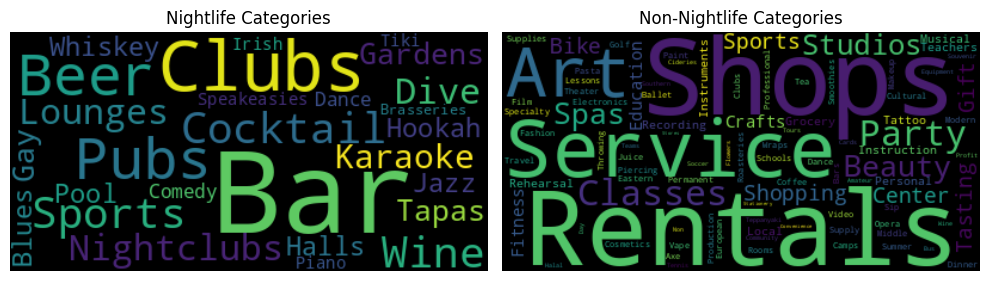

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nightlife Categories
nightlife_categories = ["Bars", "Cocktail Bars", "Sports Bars", "Beer Bar", "Wine Bars",
                       "Pubs", "Nightclubs", "Lounges", "Dive Bars", "Karaoke Bars",
                       "Beer Gardens", "Tapas Bars", "Gay Bars", "Whiskey Bars",
                       "Hookah Bars", "Pool Halls", "Jazz & Blues Clubs", "Comedy Clubs",
                       "Dance Clubs", "Speakeasies", "Tiki Bars", "Piano Bars",
                       "Irish Pubs", "Brasseries"]

# Non-Nightlife Categories
non_nightlife_categories = ["Arts & Crafts", "Beauty & Spas", "Education", "Fitness & Instruction", "Grocery",
                            "Local Services", "Recording & Rehearsal Studios", "Musical Instruments & Teachers",
                            "Tattoo", "Personal Shopping", "Electronics", "Specialty Schools", "Piercing",
                            "Summer Camps", "Permanent Makeup", "Art Classes", "Art Supplies", "Opera & Ballet",
                            "Coffee Roasteries", "Tea Rooms", "Cosmetics & Beauty Supply", "Paint & Sip",
                            "Cultural Center", "Professional Services", "Video/Film Production", "Dinner Theater",
                            "Vape Shops", "Middle Eastern", "Pasta Shops", "Modern European", "Wraps",
                            "Dance Studios", "Bike Rentals", "Fashion", "Travel Services", "Juice Bars & Smoothies",
                            "Sports Clubs", "Golf Lessons", "Axe Throwing", "Teppanyaki", "Amateur Sports Teams",
                            "Soccer", "Shopping Centers", "Halal", "Party Bike Rentals", "Party Bus Rentals",
                            "Tours", "Tennis", "Community Service/Non-Profit", "Wine Tasting Classes",
                            "Tasting Classes", "Day Spas", "Cideries", "Southern", "Party Equipment Rentals",
                            "Souvenir Shops", "Gift Shops", "Flowers & Gifts", "Cards & Stationery",
                            "Convenience Stores"]

from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt
import numpy as np

# Define custom shape functions for the masks
def nightlife_mask_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return '○'  # Circle shape for nightlife word cloud

def non_nightlife_mask_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return '□'  # Square shape for non-nightlife word cloud

# Generate word clouds with custom shape masks
nightlife_wordcloud = WordCloud(mask=None, contour_color='white', background_color='black').generate_from_text(nightlife_text)
non_nightlife_wordcloud = WordCloud(mask=None, contour_color='white', background_color='black').generate_from_text(non_nightlife_text)

# Plot word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(nightlife_wordcloud, interpolation='bilinear')
plt.title('Nightlife Categories')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_nightlife_wordcloud, interpolation='bilinear')
plt.title('Non-Nightlife Categories')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Encode text using SentenceTransformer
X = np.array(data.text)
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)
embed_data = embeddings
X = np.array(embed_data)

# Perform PCA
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))

# Compute cosine similarity matrix
cos_sim_data = pd.DataFrame(cosine_similarity(pca_data))